In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from  scipy import stats 
import numpy as np
import re

In [4]:
#https://chronicdata.cdc.gov/500-Cities-Places/PLACES-Local-Data-for-Better-Health-Place-Data-202/eav7-hnsx


#df_medical = pd.read_csv('https://chronicdata.cdc.gov/api/views/eav7-hnsx/rows.csv?accessType=DOWNLOAD&bom=true&format=true') # Takes a long time to load
df_medical = pd.read_csv('PLACES__Local_Data_for_Better_Health__Place_Data_2020_release.csv')

In [5]:
df_cancerData = df_medical[(df_medical['MeasureId']=='CANCER') & (df_medical['Data_Value_Type']=='Age-adjusted prevalence')]
df_asthmaData = df_medical[(df_medical['MeasureId']=='CASTHMA') & (df_medical['Data_Value_Type']=='Age-adjusted prevalence')]
del df_medical # free up any space

In [6]:
df_asthmaData_important = df_asthmaData[['StateAbbr','LocationName','Data_Value','Low_Confidence_Limit','High_Confidence_Limit']] 
df_cancerData_important = df_cancerData[['StateAbbr','LocationName','Data_Value','Low_Confidence_Limit','High_Confidence_Limit']] 

In [7]:
df_TRI_2018 = pd.read_csv('https://enviro.epa.gov/enviro/efservice/MV_TRI_BASIC_DOWNLOAD/year/=/2018/fname/TRI_2089_US.csv/CSV',low_memory=False)

In [8]:
df_TRI = df_TRI_2018[['6. CITY','8. ST','20. INDUSTRY SECTOR','34. CHEMICAL','42. CARCINOGEN','45. 5.1 - FUGITIVE AIR','46. 5.2 - STACK AIR','47. 5.3 - WATER','54. 5.5.2 - LAND TREATMENT','101. TOTAL RELEASES']]

In [9]:
df_TRI

,6. CITY,8. ST,20. INDUSTRY SECTOR,34. CHEMICAL,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,46. 5.2 - STACK AIR,47. 5.3 - WATER,54. 5.5.2 - LAND TREATMENT,101. TOTAL RELEASES
0,NEENAH,WI,Food,Nitrate compounds (water dissociable; reportab...,NO,0.0,0.0,0.00,0.0,0.000
1,BRYAN,TX,Nonmetallic Mineral Product,Formic acid,NO,0.0,2692.0,0.00,0.0,2692.000
2,CHICAGO,IL,Fabricated Metals,Xylene (mixed isomers),NO,219.0,1878.0,0.00,0.0,2097.000
3,HOUSTON,TX,Chemicals,Ammonia,NO,873.8,3154.0,887.46,0.0,4923.268
4,HOUSTON,TX,Chemicals,Chlorothalonil,YES,395.2,3393.4,9.02,0.0,145433.817
...,...,...,...,...,...,...,...,...,...,...
80358,PARIS,KY,Chemicals,Methyl isobutyl ketone,YES,0.0,0.0,0.00,0.0,0.000
80359,PARIS,KY,Chemicals,Lead compounds,NO,0.0,0.0,0.00,0.0,0.000
80360,TURNERS FALLS,MA,Fabricated Metals,Nickel,YES,0.0,0.0,0.00,0.0,0.000
80361,GALLATIN,TN,Electric Utilities,Zinc compounds,NO,3.0,970.0,270.00,0.0,35243.000


Now we have the base datasets inmplemented, need to learn how to merge them

Lets start withe the carcinogens cause thats the most straightforward:

In [10]:
df_carcinogen = df_TRI[df_TRI['42. CARCINOGEN']=='YES']
# Now lets group by city and state:
gb_carcinogen_by_loc = df_carcinogen.groupby(['8. ST','6. CITY'])["101. TOTAL RELEASES"].sum()

In [11]:
print(gb_carcinogen_by_loc)

8. ST  6. CITY       
AK     ANCHORAGE          1097.74000
       BETHEL              441.98000
       DELTA JUNCTION    36943.40000
       DUTCH HARBOR       1637.70000
       EIELSON AFB           0.13300
                            ...     
WY     ROCK SPRINGS      28523.24200
       SHERIDAN              2.66000
       SINCLAIR           8493.78750
       WHEATLAND         53239.72769
       WORLAND               1.00000
Name: 101. TOTAL RELEASES, Length: 5004, dtype: float64


In [12]:
df_carcinogen_by_loc = gb_carcinogen_by_loc.reset_index()
df_carcinogen_by_loc

,8. ST,6. CITY,101. TOTAL RELEASES
0,AK,ANCHORAGE,1097.74000
1,AK,BETHEL,441.98000
2,AK,DELTA JUNCTION,36943.40000
3,AK,DUTCH HARBOR,1637.70000
4,AK,EIELSON AFB,0.13300
...,...,...,...
4999,WY,ROCK SPRINGS,28523.24200
5000,WY,SHERIDAN,2.66000
5001,WY,SINCLAIR,8493.78750
5002,WY,WHEATLAND,53239.72769


In [13]:
df_cancerData_important

,StateAbbr,LocationName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
1234,AL,Coaling,6.4,6.2,6.7
1301,AL,Cottonwood,6.6,6.3,6.9
1357,AL,Fayette,6.6,6.4,6.8
1375,AL,Guin,6.7,6.4,7.0
1389,AL,Dunnavant,6.7,6.4,7.0
...,...,...,...,...,...
1593099,WI,Zoar,5.3,5.0,5.7
1593106,WI,Westboro,6.5,6.1,6.8
1593114,WY,Guernsey,6.3,6.0,6.6
1593177,WI,Steuben,6.5,6.2,6.9


In [14]:
# We have way more PLACES data than TRI... 5,004 rows versus 28,484

In [15]:
df_cancerData_important[df_cancerData_important['LocationName']=='Bethel']

,StateAbbr,LocationName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
33362,AK,Bethel,6.5,6.3,6.8
214493,CT,Bethel,6.6,6.4,6.8
215515,DE,Bethel,6.7,6.4,7.0
680012,MN,Bethel,6.3,6.0,6.7
742164,MO,Bethel,6.6,6.2,6.9
981601,NC,Bethel,6.2,5.9,6.4
1041641,OH,Bethel,6.5,6.2,6.9
1183259,PA,Bethel,6.4,6.1,6.7
1446463,VT,Bethel,6.6,6.3,7.0
1489868,WA,Bethel,6.6,6.3,6.8


In [16]:
df_carcinogen_by_loc[df_carcinogen_by_loc['6. CITY']=='BETHEL']

,8. ST,6. CITY,101. TOTAL RELEASES
1,AK,BETHEL,441.980
533,CT,BETHEL,39.136


Looks like to join ill have to correct the location names to be lowercase for both to standardize:

In [17]:
df_carcinogen_by_loc['6. CITY'] = df_carcinogen_by_loc['6. CITY'].str.lower()

In [18]:
df_cancerData_important['LocationName']= df_cancerData_important['LocationName'].str.lower()

c:\users\matth\desktop\cisc367\cisc367_dir\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_cancerData_important['LocationName'].str.lower()

1234          coaling
1301       cottonwood
1357          fayette
1375             guin
1389        dunnavant
              ...    
1593099          zoar
1593106      westboro
1593114      guernsey
1593177       steuben
1593202       bairoil
Name: LocationName, Length: 28484, dtype: object

In [20]:
combined_cancer = pd.merge(df_cancerData_important, df_carcinogen_by_loc, left_on=['StateAbbr','LocationName'],right_on=['8. ST','6. CITY'], how='right')

In [21]:
# may want to join by the left and add colums without carcinegon release to the "control" dataset

In [22]:
combined_cancer

,StateAbbr,LocationName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,8. ST,6. CITY,101. TOTAL RELEASES
0,AK,anchorage,6.3,6.2,6.3,AK,anchorage,1097.74000
1,AK,bethel,6.5,6.3,6.8,AK,bethel,441.98000
2,AK,delta junction,6.5,6.2,6.8,AK,delta junction,36943.40000
3,NaN,NaN,NaN,NaN,NaN,AK,dutch harbor,1637.70000
4,AK,eielson afb,4.7,4.4,5.0,AK,eielson afb,0.13300
...,...,...,...,...,...,...,...,...
5014,WY,rock springs,6.5,6.3,6.6,WY,rock springs,28523.24200
5015,WY,sheridan,6.4,6.3,6.6,WY,sheridan,2.66000
5016,WY,sinclair,6.4,6.1,6.7,WY,sinclair,8493.78750
5017,WY,wheatland,6.5,6.2,6.8,WY,wheatland,53239.72769


In [23]:
combined_cancer = combined_cancer.dropna()
combined_cancer = combined_cancer.drop(columns=['8. ST','6. CITY'],index=1)

In [24]:
newLabels = ["State","City","Age-adjusted cancer rate (%)", "Lower CI for cancer rate","Upper CI for cancer rate","Total carcinegon release (lb)"]

In [25]:
combined_cancer.columns = newLabels
combined_cancer

,State,City,Age-adjusted cancer rate (%),Lower CI for cancer rate,Upper CI for cancer rate,Total carcinegon release (lb)
0,AK,anchorage,6.3,6.2,6.3,1097.74000
2,AK,delta junction,6.5,6.2,6.8,36943.40000
4,AK,eielson afb,4.7,4.4,5.0,0.13300
5,AK,fairbanks,6.2,6.1,6.3,183054.10890
6,AK,fort greely,5.5,5.2,5.8,0.00000
...,...,...,...,...,...,...
5014,WY,rock springs,6.5,6.3,6.6,28523.24200
5015,WY,sheridan,6.4,6.3,6.6,2.66000
5016,WY,sinclair,6.4,6.1,6.7,8493.78750
5017,WY,wheatland,6.5,6.2,6.8,53239.72769


#### Now lets look for some corerlations:

First lets plot carcinegon release over age-adjusted rancer rate:

(0.1, 10000000.0)

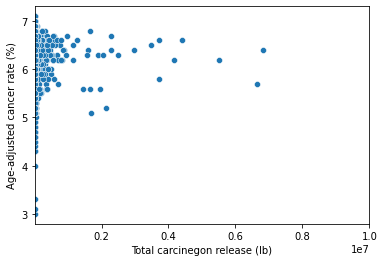

In [40]:
sns.scatterplot(y='Age-adjusted cancer rate (%)',x='Total carcinegon release (lb)', data=combined_cancer)
plt.xlim(0.1,10000000)

Note a strong correlation off the bat, may have issues with axes sizing though

(0.1, 100000000)

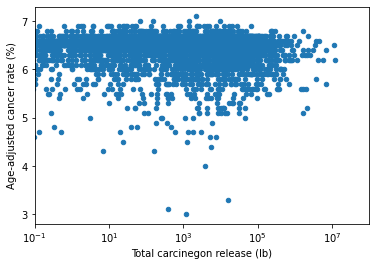

In [41]:
combined_cancer.plot.scatter(y='Age-adjusted cancer rate (%)',x='Total carcinegon release (lb)')
plt.xscale('log')
plt.xlim(0.1,100000000)

Cancer rates do seem to be about the same regardless of emissions. What does a statistical test say?

In [42]:
[r, p] = stats.pearsonr(combined_cancer['Total carcinegon release (lb)'],combined_cancer['Age-adjusted cancer rate (%)'])
print("The Pearson correlation coefficient is: ", r, "and is not statistically significant with a p of ", p)

The Pearson correlation coefficient is:  -0.036198572365647615 and is not statistically significant with a p of  0.016647082339698246


Not that this is necissarilly wrong, but did I drope cities without emissions? As that seems wrong:

In [43]:
combined_cancer = pd.merge(df_cancerData_important, df_carcinogen_by_loc, left_on=['StateAbbr','LocationName'],right_on=['8. ST','6. CITY'], how='left')
combined_cancer = combined_cancer.drop(columns=['8. ST','6. CITY'],index=1)
newLabels = ["State","City","Age-adjusted cancer rate (%)", "Lower CI for cancer rate","Upper CI for cancer rate","Total carcinegon release (lb)"]
combined_cancer.columns = newLabels

combined_cancer

,State,City,Age-adjusted cancer rate (%),Lower CI for cancer rate,Upper CI for cancer rate,Total carcinegon release (lb)
0,AL,coaling,6.4,6.2,6.7,NaN
2,AL,fayette,6.6,6.4,6.8,18.27
3,AL,guin,6.7,6.4,7.0,2114.00
4,AL,dunnavant,6.7,6.4,7.0,NaN
5,AL,hartselle,6.7,6.5,6.8,NaN
...,...,...,...,...,...,...
28479,WI,zoar,5.3,5.0,5.7,NaN
28480,WI,westboro,6.5,6.1,6.8,NaN
28481,WY,guernsey,6.3,6.0,6.6,21943.00
28482,WI,steuben,6.5,6.2,6.9,NaN


In [44]:
combined_cancer["Total carcinegon release (lb)"] = combined_cancer["Total carcinegon release (lb)"].fillna(0)
combined_cancer

,State,City,Age-adjusted cancer rate (%),Lower CI for cancer rate,Upper CI for cancer rate,Total carcinegon release (lb)
0,AL,coaling,6.4,6.2,6.7,0.00
2,AL,fayette,6.6,6.4,6.8,18.27
3,AL,guin,6.7,6.4,7.0,2114.00
4,AL,dunnavant,6.7,6.4,7.0,0.00
5,AL,hartselle,6.7,6.5,6.8,0.00
...,...,...,...,...,...,...
28479,WI,zoar,5.3,5.0,5.7,0.00
28480,WI,westboro,6.5,6.1,6.8,0.00
28481,WY,guernsey,6.3,6.0,6.6,21943.00
28482,WI,steuben,6.5,6.2,6.9,0.00


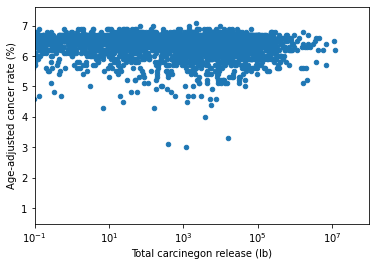

In [45]:
combined_cancer.plot.scatter(y='Age-adjusted cancer rate (%)',x='Total carcinegon release (lb)')
plt.xlim(0.1,100000000)
plt.xscale('log')

In [46]:
[r, p] = stats.pearsonr(combined_cancer['Total carcinegon release (lb)'],combined_cancer['Age-adjusted cancer rate (%)'])
print("The Pearson correlation coefficient is: ", r, "and is statistically significant with a p of ", p)

The Pearson correlation coefficient is:  -0.012171734143586263 and is statistically significant with a p of  0.03995651043456674


ValueError: Could not interpret value `Total carcinogen release (lb)` for parameter `x`

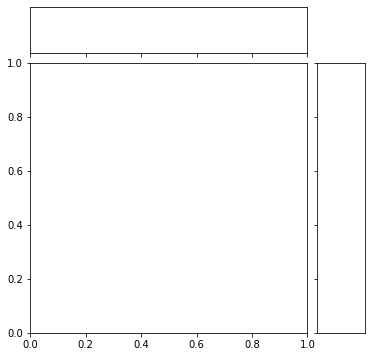

In [49]:
g = sns.jointplot(data=combined_cancer, x="Total carcinogen release (lb)", y="Age-adjusted cancer rate (%)",xlim=(0.00001,100000000),kind='scatter')
g.ax_joint.set_xscale('log')
plt.show()
# I like these in general, but too cluttered.

So not really the expected trend, not super surprising given the contraints of the data set, and the fact that concentrations decrease by a r^3 dependence.

### Dr. Bart likes histograms, probably should check the overall distributions

Should probably go above....

In [ ]:
combined_cancer.hist(column = 'Age-adjusted cancer rate (%)',bins=20) # Similar in most places...

array([[<AxesSubplot:title={'center':'Total carcinegon release (lb)'}>]],
      dtype=object)

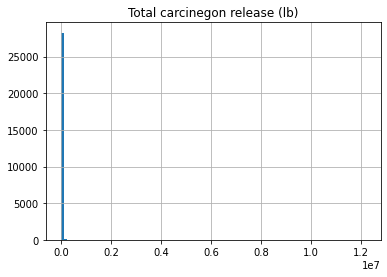

In [50]:
combined_cancer.hist(column = 'Total carcinegon release (lb)',bins=100) # vast majority of cities have no recorded emissions.

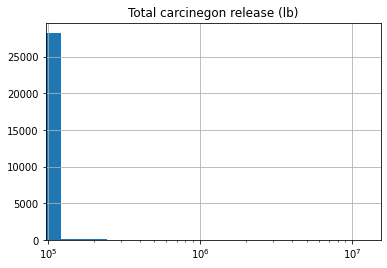

In [51]:
combined_cancer.hist(column = 'Total carcinegon release (lb)',bins=100) # vast majority of cities have no recorded emissions
plt.xscale('log')

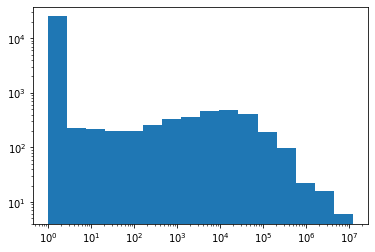

In [52]:
# learned the log scale: https://stackoverflow.com/questions/47850202/plotting-a-histogram-on-a-log-scale-with-matplotlib

x = combined_cancer['Total carcinegon release (lb)'] + 1 # Plus one to make the transformation work...
hist, bins = np.histogram(x, bins=16)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')
plt.yscale('log')
plt.show()

### What if we only look at emissions from water?

Water emissions - one would think, would have a less strong dependence on distance from the facitlity,
need to start by remaking the cancer dataset:

In [53]:
gb_carcinogen_by_loc_water = df_carcinogen.groupby(['8. ST','6. CITY'])['47. 5.3 - WATER'].sum()
df_carcinogen_by_loc_water = gb_carcinogen_by_loc_water.reset_index()
df_carcinogen_by_loc_water['6. CITY'] = df_carcinogen_by_loc_water['6. CITY'].str.lower()
combined_cancer_water = pd.merge(df_cancerData_important, df_carcinogen_by_loc_water, left_on=['StateAbbr','LocationName'],right_on=['8. ST','6. CITY'], how='left')
combined_cancer_water = combined_cancer_water.drop(columns=['8. ST','6. CITY'],index=1)
newLabels = ["State","City","Age-adjusted cancer rate (%)", "Lower CI for cancer rate","Upper CI for cancer rate","Total carcinegon releases to water (lb)"]
combined_cancer_water.columns = newLabels

(4.0, 7.0)

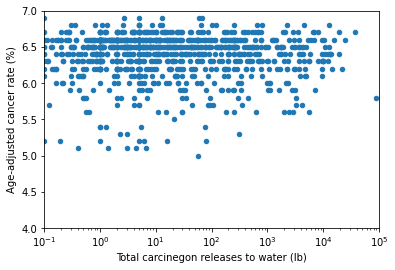

In [54]:
# Setting nan to zero:
combined_cancer_water0 = combined_cancer_water
combined_cancer_water0["Total carcinegon releases to water (lb)"] = combined_cancer_water0["Total carcinegon releases to water (lb)"].fillna(0)
combined_cancer_water0.plot.scatter(y='Age-adjusted cancer rate (%)',x="Total carcinegon releases to water (lb)")
plt.xscale('log')
plt.xlim(0.1,100000)
plt.ylim(4,7)

In [55]:
# Dropping
[r, p] = stats.pearsonr(combined_cancer_water0["Total carcinegon releases to water (lb)"],combined_cancer_water0['Age-adjusted cancer rate (%)'])
print("The Pearson correlation coefficient is: ", r, "and is statistically significant with a p of ", p)

The Pearson correlation coefficient is:  -0.006020940627801662 and is statistically significant with a p of  0.3095754925067597


The Pearson correlation coefficient is:  -0.017525840739286737 and is statistically significant with a p of  0.24640903448061305

Is the output if the zeros are not included....

Both not signficant. Likely too much noise

Out of interest what happens if we drop zeros?

The Pearson correlation coefficient is:  -0.04093921432921953 and is statistically significant with a p of  0.25497972461319723


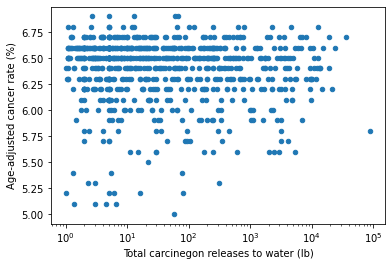

In [56]:
only_emissions = combined_cancer_water[(combined_cancer_water["Total carcinegon releases to water (lb)"]>1)]
only_emissions.plot.scatter(y='Age-adjusted cancer rate (%)',x="Total carcinegon releases to water (lb)")
plt.xscale('log')
[r, p] = stats.pearsonr(only_emissions["Total carcinegon releases to water (lb)"],only_emissions['Age-adjusted cancer rate (%)'])
print("The Pearson correlation coefficient is: ", r, "and is statistically significant with a p of ", p)

## Okay, what about landfills?




In [57]:
gb_carcinogen_by_loc_land = df_carcinogen.groupby(['8. ST','6. CITY'])['54. 5.5.2 - LAND TREATMENT'].sum()
df_carcinogen_by_loc_land = gb_carcinogen_by_loc_land.reset_index()
df_carcinogen_by_loc_land['6. CITY'] = df_carcinogen_by_loc_land['6. CITY'].str.lower()
combined_cancer_land = pd.merge(df_cancerData_important, df_carcinogen_by_loc_land, left_on=['StateAbbr','LocationName'],right_on=['8. ST','6. CITY'], how='left')
combined_cancer_land = combined_cancer_land.drop(columns=['8. ST','6. CITY'],index=1)
newLabels = ["State","City","Age-adjusted cancer rate (%)", "Lower CI for cancer rate","Upper CI for cancer rate","Total carcinegon releases to landfills (lb)"]
combined_cancer_land.columns = newLabels

(0.01, 100000)

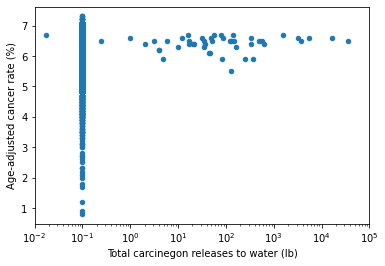

In [58]:
# Setting nan to zero:
combined_cancer_land = combined_cancer_land
combined_cancer_land["Total carcinegon releases to water (lb)"] = combined_cancer_land["Total carcinegon releases to landfills (lb)"].fillna(0.1) # artificial line on scatter
combined_cancer_land.plot.scatter(y='Age-adjusted cancer rate (%)',x="Total carcinegon releases to water (lb)")
plt.xscale('log')
plt.xlim(0.01,100000)

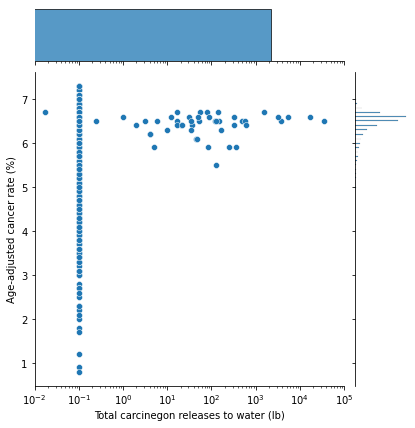

In [59]:
g = sns.jointplot(data=combined_cancer_land, x="Total carcinegon releases to water (lb)", y="Age-adjusted cancer rate (%)",xlim=(0.01,100000))
g.ax_joint.set_xscale('log')
plt.show()

The bar associated with the total carcinegon rate really does not show anything.

In [60]:
[r, p] = stats.pearsonr(combined_cancer_land["Total carcinegon releases to landfills (lb)"],combined_cancer_land['Age-adjusted cancer rate (%)'])
print("The Pearson correlation coefficient is: ", r, "and is statistically significant with a p of ", p)

ValueError: array must not contain infs or NaNs

Not signficant.....

## Onto Asthma

Looks like the TRI does not report NOx or SOx, might be able to correlate with general industrial activity

## Histograms!

Lets see the distribution:

In [ ]:
df_asthmaData_important.hist(column = 'Data_Value',bins=20) 

In [ ]:
df_asthmaData_important

#### Ozone

In [ ]:
df_TRI_ozone = df_TRI[df_TRI['34. CHEMICAL']=='Ozone'] # not a promisingly large data set...

gb_ozone = df_TRI_ozone.groupby(['8. ST','6. CITY'])['101. TOTAL RELEASES'].sum()
df_ozone = gb_ozone.reset_index()
df_ozone['6. CITY'] = df_ozone['6. CITY'].str.lower()
combined_ozone = pd.merge(df_asthmaData_important, df_ozone, left_on=['StateAbbr','LocationName'],right_on=['8. ST','6. CITY'], how='left')
combined_ozone = combined_ozone.drop(columns=['8. ST','6. CITY'],index=1)
newLabels = ["State","City","Age-adjusted cancer rate (%)", "Lower CI for cancer rate","Upper CI for cancer rate","Total carcinegon releases (lb)"]
combined_ozone.columns = newLabels

In [ ]:
combined_ozone_noNa = combined_ozone.dropna()
combined_ozone_noNa.plot.scatter(y='Age-adjusted cancer rate (%)',x="Total ozone releases (lb)")

In [ ]:
[r, p] = stats.pearsonr(combined_ozone_noNa["Total carcinegon releases (lb)"],combined_ozone_noNa['Age-adjusted cancer rate (%)'])
print("The Pearson correlation coefficient is: ", r, "and is statistically significant with a p of ", p)

In [ ]:
combined_ozone_0 = combined_ozone.fillna(0)
[r, p] = stats.pearsonr(combined_ozone_0["Total carcinegon releases (lb)"],combined_ozone_0['Age-adjusted cancer rate (%)'])
print("The Pearson correlation coefficient is: ", r, "and is statistically significant with a p of ", p)

### All chemicals

In [ ]:
gb_all_loc = df_TRI.groupby(['8. ST','6. CITY'])['101. TOTAL RELEASES'].sum()
df_all_loc = gb_all_loc.reset_index()
df_all_loc['6. CITY'] = df_all_loc['6. CITY'].str.lower()
df_asthmaData_important['LocationName'] = df_asthmaData_important['LocationName'].str.lower()
combined_asthma_all = pd.merge(df_asthmaData_important, df_all_loc, left_on=['StateAbbr','LocationName'],right_on=['8. ST','6. CITY'], how='left')
combined_asthma_all = combined_asthma_all.drop(columns=['8. ST','6. CITY'],index=1)
newLabels = ["State","City","Age-adjusted asthma rate (%)", "Lower CI for asthma rate","Upper CI for asthma rate","Total chemical releases (lb)"]
combined_asthma_all.columns = newLabels

In [ ]:
combined_asthma_all

In [ ]:
combined_asthma_all["Total chemical releases (lb)"] = combined_asthma_all["Total chemical releases (lb)"].fillna(0.0002)
combined_asthma_all.plot.scatter(y='Age-adjusted asthma rate (%)',x="Total chemical releases (lb)")
plt.xlim(0.00001,100000000)
plt.xscale('log')
plt.show()

In [ ]:
[r, p] = stats.pearsonr(combined_asthma_all["Total chemical releases (lb)"],combined_asthma_all["Age-adjusted asthma rate (%)"])
print("The Pearson correlation coefficient is: ", r, "and is statistically significant with a p of ", p)

#### What about using all emissions as a surrogate?

Could do that if it is justified via a seperate dataset:

NEI Point source data has NOx and PM

In [ ]:
df_TRI_2014 = pd.read_csv('https://enviro.epa.gov/enviro/efservice/MV_TRI_BASIC_DOWNLOAD/year/=/2014/fname/TRI_2014_US.csv/CSV',low_memory=False)
df_TRI_2014 = df_TRI_2014[['8. ST','7. COUNTY','34. CHEMICAL','101. TOTAL RELEASES']]

In [ ]:
df_TRI_2014['7. COUNTY'] = df_TRI_2014['7. COUNTY'].str.lower()
df_2014_all = df_TRI_2014.groupby(['8. ST','7. COUNTY'])['101. TOTAL RELEASES'].sum().reset_index()

In [ ]:
df_NEI_PS = pd.read_csv('NEI_Report_PointSource_Data_2014v2.txt',sep='|')

In [ ]:
df_NEI_PS = df_NEI_PS[['STATE','STATE_COUNTY','POLLUTANT','EMISSION_TONS']]
df_NEI_PS['County'] = df_NEI_PS['STATE_COUNTY'].str.extract(r'(\w+$)')
df_NEI_PS['State'] = df_NEI_PS['STATE_COUNTY'].str.extract(r'(^\w+)')

In [ ]:
df_NEI_PS['County'] = df_NEI_PS['County'].str.lower()
df_NEI_PS

In [ ]:
df_NOx = df_NEI_PS[df_NEI_PS['POLLUTANT']=='Nitrogen Oxides']
df_PM = df_NEI_PS[df_NEI_PS['POLLUTANT']=='PM10']
df_NOx = df_NOx.groupby(['State','County'])['EMISSION_TONS'].sum().reset_index()
df_PM = df_PM.groupby(['State','County'])['EMISSION_TONS'].sum().reset_index()

In [ ]:
combined_NOx = pd.merge(df_NOx, df_2014_all, left_on=['State','County'],right_on=['8. ST','7. COUNTY'], how='left')

In [ ]:
combined_NOx = combined_NOx.dropna() # drops AK due to name conventions
combined_NOx.plot.scatter(x='101. TOTAL RELEASES',y='EMISSION_TONS')
[r, p] = stats.pearsonr(combined_NOx["101. TOTAL RELEASES"],combined_NOx['EMISSION_TONS'])
print("The Pearson correlation coefficient is: ", r, "and is statistically significant with a p of ", p)

In [ ]:
combined_PM = pd.merge(df_PM, df_2014_all, left_on=['State','County'],right_on=['8. ST','7. COUNTY'], how='left')

combined_PM = combined_PM.dropna()
combined_PM.plot.scatter(x='101. TOTAL RELEASES',y='EMISSION_TONS')
[r, p] = stats.pearsonr(combined_PM["101. TOTAL RELEASES"],combined_PM['EMISSION_TONS'])
print("The Pearson correlation coefficient is: ", r, "and is statistically significant with a p of ", p)

In [ ]:
# Trying subplots:
combined_NOx = pd.merge(df_NOx, df_2014_all, left_on=['State','County'],right_on=['8. ST','7. COUNTY'], how='left')
combined_NOx = combined_NOx.dropna() # drops AK due to name conventions 
combined_PM = pd.merge(df_PM, df_2014_all, left_on=['State','County'],right_on=['8. ST','7. COUNTY'], how='left')
combined_PM = combined_PM.dropna()
fig = plt.figure()
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

combined_NOx.plot.scatter(x='101. TOTAL RELEASES',y='EMISSION_TONS',ax = fig.add_subplot(221))
plt.ylabel("NOx emissions (tonnes)")
plt.xlabel("Total TRI emissions (lb)")


combined_PM.plot.scatter(x='101. TOTAL RELEASES',y='EMISSION_TONS',ax = fig.add_subplot(222))
#plt.ylabel("PM emissions (tonnes)")
#plt.xlabel("Total TRI emissions (lb)")
# but they come out poorly...

## Mining

Finally, interested in impact of mining activity, measure indirectly by total emissions from the industry:

In [ ]:
df_TRI["20. INDUSTRY SECTOR"].value_counts()

In [ ]:
df_coal = df_TRI[df_TRI["20. INDUSTRY SECTOR"] == "Coal Mining"]
df_coal = df_TRI[df_TRI["20. INDUSTRY SECTOR"] == "Coal Mining"]gb_coal = df_coal.groupby(['8. ST','6. CITY'])['101. TOTAL RELEASES'].sum()
df_coal = gb_coal.reset_index()
df_coal['6. CITY'] = df_coal['6. CITY'].str.lower()
asthma_coal = pd.merge(df_asthmaData_important, df_coal, left_on=['StateAbbr','LocationName'],right_on=['8. ST','6. CITY'], how='left')
asthma_coal = asthma_coal.drop(columns=['8. ST','6. CITY'],index=1)
newLabels = ["State","City","Age-adjusted asthma rate (%)", "Lower CI for asthma rate","Upper CI for asthma rate","Total coal mining related releases (lb)"]
asthma_coal.columns = newLabels
asthma_coal = asthma_coal.dropna()

In [ ]:
#asthma_coal["Total chemical releases (lb)"] = combined_asthma_all["Total chemical releases (lb)"].fillna(0.0002)
asthma_coal.plot.scatter(y='Age-adjusted asthma rate (%)',x="Total coal mining related releases (lb)")
#plt.xlim(0.00001,100000000)
#plt.xscale('log')
plt.show()

In [ ]:
[r, p] = stats.pearsonr(asthma_coal["101. TOTAL RELEASES"],asthma_coal['Age-adjusted asthma rate (%)'])
print("The Pearson correlation coefficient is: ", r, "and is statistically significant with a p of ", p)

May as well include, not a lot of data tho...